## Decision Tree Method

In [35]:
# Importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',100)
pd.set_option('display.width',1000)

In [2]:
# Importing the csv file 
df=pd.read_csv('Company_salary_prediction.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


## Hot Encoder label 

In [3]:
#Import Hot encoder to convert the str into int value 
from sklearn import preprocessing 
f= preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [4]:
dell= OneHotEncoder()

In [5]:
df['f_company']=f.fit_transform(df['company'])
df['f_job']=f.fit_transform(df['job'])
df['f_degree']=f.fit_transform(df['degree'])

In [6]:
df

,company,job,degree,salary_more_then_100k,f_company,f_job,f_degree
0,google,sales executive,bachelors,0,2,2,0
1,google,sales executive,masters,0,2,2,1
2,google,business manager,bachelors,1,2,0,0
3,google,business manager,masters,1,2,0,1
4,google,computer programmer,bachelors,0,2,1,0
5,google,computer programmer,masters,1,2,1,1
6,abc pharma,sales executive,masters,0,0,2,1
7,abc pharma,computer programmer,bachelors,0,0,1,0
8,abc pharma,business manager,bachelors,0,0,0,0
9,abc pharma,business manager,masters,1,0,0,1


In [7]:
df=df.drop(columns=['company','job','degree'])
df

,salary_more_then_100k,f_company,f_job,f_degree
0,0,2,2,0
1,0,2,2,1
2,1,2,0,0
3,1,2,0,1
4,0,2,1,0
5,1,2,1,1
6,0,0,2,1
7,0,0,1,0
8,0,0,0,0
9,1,0,0,1


In [8]:
X=df.drop(columns=['salary_more_then_100k'])
y=df['salary_more_then_100k']

In [9]:
X

,f_company,f_job,f_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [10]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

## SPLIT

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.2)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
ref= LinearRegression()

In [15]:
ref.fit(X_train,y_train)

LinearRegression()

In [16]:
ref.coef_

array([5.00000000e-01, 5.32183818e-19, 5.00000000e-01])

In [17]:
ref.intercept_

-1.1102230246251565e-16

In [18]:
ref.score(X_train,y_train)

1.0

In [19]:
ref.predict([[1,2,0]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.5])

In [20]:
ref.predict([[0,1,0]])  # If you found any error as 2 D array can  place one more bracket in it.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1.10490119e-16])

In [21]:
import pickle

In [22]:
pickle_out=open("Salary_model.pk",'wb')
pickle.dump(ref,pickle_out)
pickle_out.close()

In [23]:
ref.predict([[1,1,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.])

## Number of bachelors & masters degree holders

In [24]:
model_chart=pd.read_csv('Company_salary_prediction.csv')
model_chart

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [25]:
model_chart

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [26]:
model_chart.degree.value_counts()

bachelors    8
masters      8
Name: degree, dtype: int64

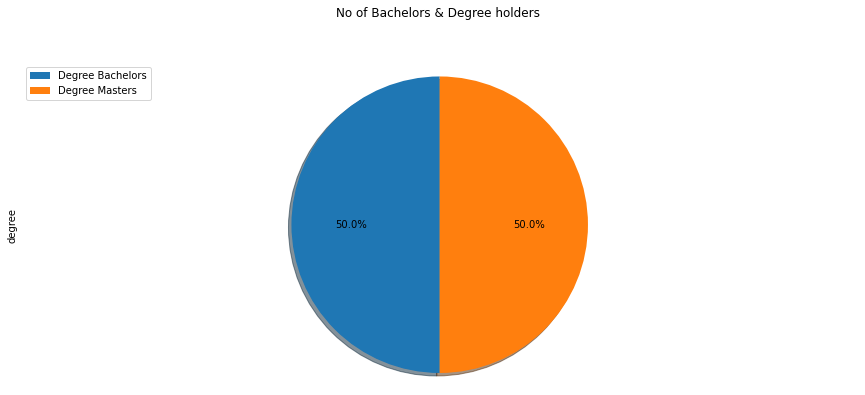

In [27]:
# Draw a pie chart for the degree holders
labels='Degree Bachelors','Degree Masters'
model_chart.degree.astype(str).value_counts().plot(kind='pie',
                                                figsize=(15,6),
                                                autopct='%1.1f%%',
                                                startangle=90,
                                                shadow=True,
                                                labels=None)
plt.title('No of Bachelors & Degree holders ',y=1.12)
plt.axis('equal')
plt.legend(labels=labels,loc='upper left')
plt.show()

In [28]:
model_chart.job.value_counts()

business manager       6
sales executive        5
computer programmer    5
Name: job, dtype: int64

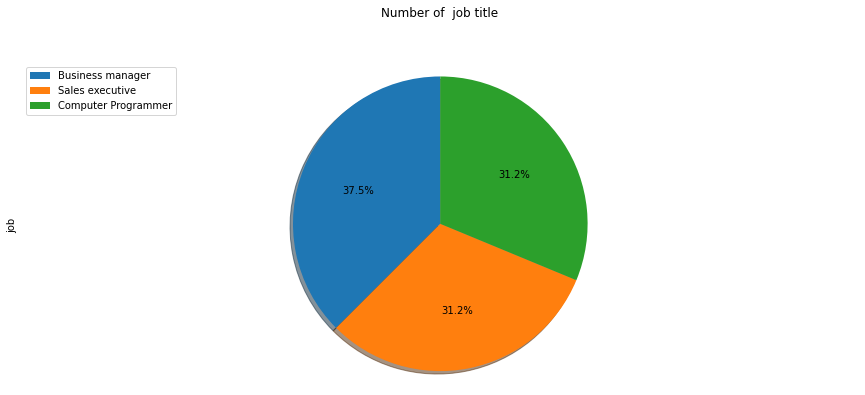

In [29]:
# Draw the pie chart for job
labels='Business manager','Sales executive','Computer Programmer'
model_chart.job.astype(str).value_counts().plot(kind='pie',
                                                figsize=(15,6),
                                                autopct='%1.1f%%',
                                                startangle=90,
                                                shadow=True,
                                                labels=None)
plt.title('Number of  job title',y=1.12)
plt.axis('equal')
plt.legend(labels=labels,loc='upper left')
plt.show()                                      

In [30]:
# Draw the no of company distribution
model_chart['company'].value_counts()

google        6
facebook      6
abc pharma    4
Name: company, dtype: int64

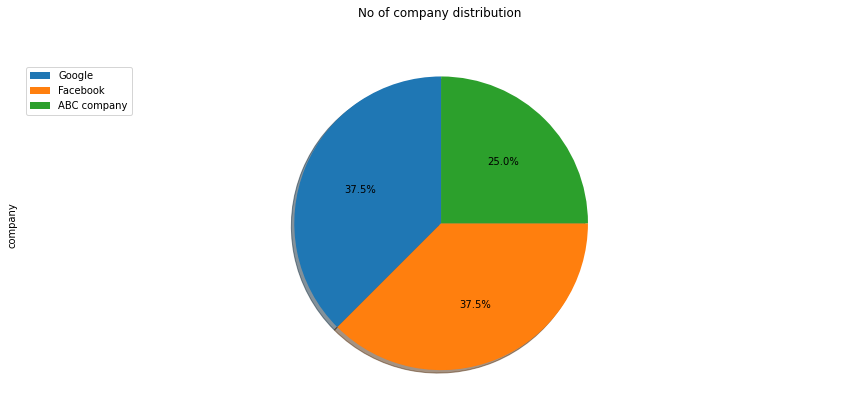

In [31]:
labels='Google','Facebook','ABC company'
model_chart.company.astype(str).value_counts().plot(kind='pie',
                                                figsize=(15,6),
                                                autopct='%1.1f%%',
                                                startangle=90,
                                                shadow=True,
                                                labels=None)
plt.title('No of company distribution',y=1.12)
plt.axis('equal')
plt.legend(labels=labels,loc='upper left')
plt.show()                                      

In [33]:
model_chart.head(2)

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0


In [37]:
sal=pd.DataFrame(model_chart[model_chart.salary_more_then_100k
=="1"].company.value_counts())
sal.reset_index(level=0,inplace=True)
sal=sal.sort_values(by='company',ascending=False)
sal.columns=("company","salary_more_then_100k")
#col=["3A0EE8","3A7EE8","3A7E0E","6BE81A","FF1C31","FF0DB5","394873","FFC202"]
plt.figure(figsize=(25,8))
sns.barplot(x="company",y="salary_more_then_100k",data=sal,palette="Set1_r")
plt.xlabel("company")
plt.ylabel("salary_more_then_100k")

ValueError: min() arg is an empty sequence

<Figure size 1800x576 with 0 Axes>